In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Load the data

In [3]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('data/diagnosis.csv')
dataset = pd_dat.values

In [6]:
dataset[:5]

array([[35.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [35.9,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [35.9,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36. ,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [4]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [5]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [6]:
# Build the input layers
from tensorflow.keras import Input, layers
shape_inputs=(1,)
temperature=Input(shape=shape_inputs, name='temp')
nausea_occurence=Input(shape=shape_inputs, name='nocc')
lumbar_pain=Input(shape=shape_inputs, name='lumbp')
urine_pushing=Input(shape=shape_inputs, name='up')
micturition_pains=Input(shape=shape_inputs, name='mict')
bis=Input(shape=shape_inputs, name='bis')


In [7]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [8]:
# Merge all input features into a single large vector

x=layers.concatenate(list_inputs)

In [10]:
# Use a logistic regression classifier for disease prediction

inflammation_pred=layers.Dense(1, activation='sigmoid', name='inflam')(x)
nephritis_pred=layers.Dense(1,activation='sigmoid', name='nephr')(x)

In [11]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [12]:
# Create the model object

model=tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

#### Plot the model

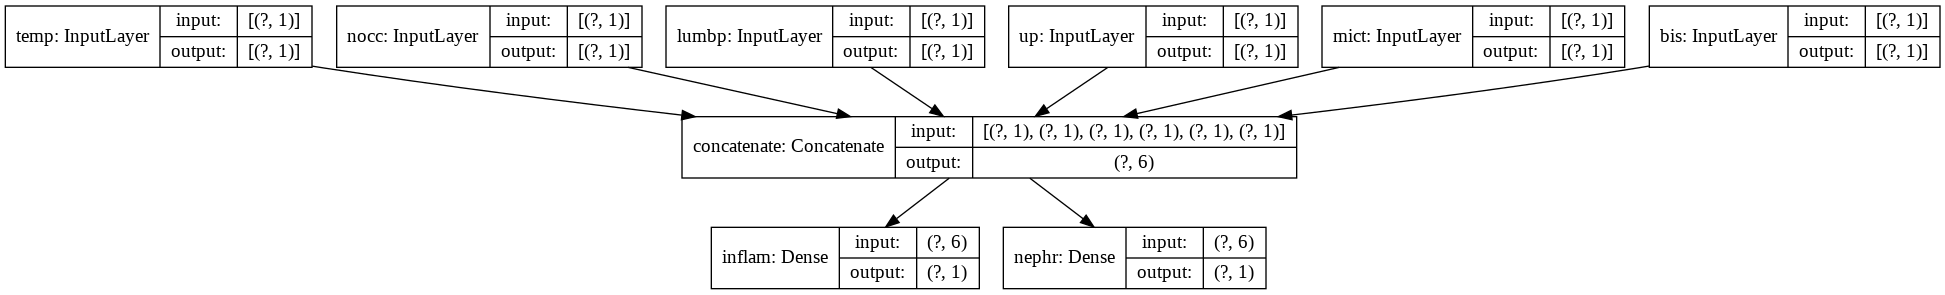

In [13]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model,'multi_input_output_model.png', show_shapes=True)

#### Compile the model

In [14]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
             loss={'inflam':'binary_crossentropy',
                  'nephr':'binary_crossentropy'},
                metrics=['acc'],
                loss_weights=[1.0,0.2])

#### Fit the model 

In [15]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [16]:
# Train the model

history=model.fit(inputs_train,outputs_train,
                 epochs=1000,
                 batch_size=128,
                 verbose=2)

Train on 80 samples
Epoch 1/1000
80/80 - 1s - loss: 4.2619 - inflam_loss: 3.7171 - nephr_loss: 2.7240 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 2/1000
80/80 - 0s - loss: 4.1868 - inflam_loss: 3.6536 - nephr_loss: 2.6659 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 3/1000
80/80 - 0s - loss: 4.1323 - inflam_loss: 3.6076 - nephr_loss: 2.6238 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 4/1000
80/80 - 0s - loss: 4.0868 - inflam_loss: 3.5690 - nephr_loss: 2.5886 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 5/1000
80/80 - 0s - loss: 4.0463 - inflam_loss: 3.5348 - nephr_loss: 2.5574 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 6/1000
80/80 - 0s - loss: 4.0093 - inflam_loss: 3.5035 - nephr_loss: 2.5288 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 7/1000
80/80 - 0s - loss: 3.9746 - inflam_loss: 3.4742 - nephr_loss: 2.5022 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 8/1000
80/80 - 0s - loss: 3.9418 - inflam_loss: 3.4464 - nephr_loss: 2.4769 - inflam_acc: 0.5250 - nephr_acc: 0.5

Epoch 67/1000
80/80 - 0s - loss: 2.5115 - inflam_loss: 2.2261 - nephr_loss: 1.4270 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 68/1000
80/80 - 0s - loss: 2.4893 - inflam_loss: 2.2068 - nephr_loss: 1.4125 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 69/1000
80/80 - 0s - loss: 2.4672 - inflam_loss: 2.1876 - nephr_loss: 1.3980 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 70/1000
80/80 - 0s - loss: 2.4452 - inflam_loss: 2.1684 - nephr_loss: 1.3837 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 71/1000
80/80 - 0s - loss: 2.4232 - inflam_loss: 2.1493 - nephr_loss: 1.3695 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 72/1000
80/80 - 0s - loss: 2.4013 - inflam_loss: 2.1302 - nephr_loss: 1.3555 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 73/1000
80/80 - 0s - loss: 2.3795 - inflam_loss: 2.1112 - nephr_loss: 1.3416 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 74/1000
80/80 - 0s - loss: 2.3578 - inflam_loss: 2.0922 - nephr_loss: 1.3279 - inflam_acc: 0.5250 - nephr_acc: 0.5875
Epoch 75

Epoch 133/1000
80/80 - 0s - loss: 1.3230 - inflam_loss: 1.1464 - nephr_loss: 0.8835 - inflam_acc: 0.5250 - nephr_acc: 0.5125
Epoch 134/1000
80/80 - 0s - loss: 1.3119 - inflam_loss: 1.1355 - nephr_loss: 0.8820 - inflam_acc: 0.5250 - nephr_acc: 0.5125
Epoch 135/1000
80/80 - 0s - loss: 1.3010 - inflam_loss: 1.1249 - nephr_loss: 0.8806 - inflam_acc: 0.5250 - nephr_acc: 0.5125
Epoch 136/1000
80/80 - 0s - loss: 1.2904 - inflam_loss: 1.1145 - nephr_loss: 0.8794 - inflam_acc: 0.5250 - nephr_acc: 0.5125
Epoch 137/1000
80/80 - 0s - loss: 1.2801 - inflam_loss: 1.1044 - nephr_loss: 0.8782 - inflam_acc: 0.5250 - nephr_acc: 0.5125
Epoch 138/1000
80/80 - 0s - loss: 1.2700 - inflam_loss: 1.0946 - nephr_loss: 0.8771 - inflam_acc: 0.5250 - nephr_acc: 0.5125
Epoch 139/1000
80/80 - 0s - loss: 1.2602 - inflam_loss: 1.0850 - nephr_loss: 0.8762 - inflam_acc: 0.5250 - nephr_acc: 0.5125
Epoch 140/1000
80/80 - 0s - loss: 1.2507 - inflam_loss: 1.0756 - nephr_loss: 0.8753 - inflam_acc: 0.5250 - nephr_acc: 0.5125


Epoch 199/1000
80/80 - 0s - loss: 1.0485 - inflam_loss: 0.8793 - nephr_loss: 0.8458 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 200/1000
80/80 - 0s - loss: 1.0478 - inflam_loss: 0.8787 - nephr_loss: 0.8453 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 201/1000
80/80 - 0s - loss: 1.0471 - inflam_loss: 0.8781 - nephr_loss: 0.8448 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 202/1000
80/80 - 0s - loss: 1.0464 - inflam_loss: 0.8775 - nephr_loss: 0.8443 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 203/1000
80/80 - 0s - loss: 1.0457 - inflam_loss: 0.8769 - nephr_loss: 0.8439 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 204/1000
80/80 - 0s - loss: 1.0450 - inflam_loss: 0.8763 - nephr_loss: 0.8434 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 205/1000
80/80 - 0s - loss: 1.0443 - inflam_loss: 0.8757 - nephr_loss: 0.8429 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 206/1000
80/80 - 0s - loss: 1.0436 - inflam_loss: 0.8751 - nephr_loss: 0.8424 - inflam_acc: 0.1625 - nephr_acc: 0.5125


Epoch 265/1000
80/80 - 0s - loss: 1.0027 - inflam_loss: 0.8398 - nephr_loss: 0.8144 - inflam_acc: 0.1750 - nephr_acc: 0.5125
Epoch 266/1000
80/80 - 0s - loss: 1.0020 - inflam_loss: 0.8392 - nephr_loss: 0.8140 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 267/1000
80/80 - 0s - loss: 1.0013 - inflam_loss: 0.8386 - nephr_loss: 0.8135 - inflam_acc: 0.1750 - nephr_acc: 0.5125
Epoch 268/1000
80/80 - 0s - loss: 1.0007 - inflam_loss: 0.8380 - nephr_loss: 0.8130 - inflam_acc: 0.1625 - nephr_acc: 0.5125
Epoch 269/1000
80/80 - 0s - loss: 1.0000 - inflam_loss: 0.8375 - nephr_loss: 0.8126 - inflam_acc: 0.2000 - nephr_acc: 0.5125
Epoch 270/1000
80/80 - 0s - loss: 0.9993 - inflam_loss: 0.8369 - nephr_loss: 0.8121 - inflam_acc: 0.2000 - nephr_acc: 0.5125
Epoch 271/1000
80/80 - 0s - loss: 0.9987 - inflam_loss: 0.8364 - nephr_loss: 0.8116 - inflam_acc: 0.2375 - nephr_acc: 0.5125
Epoch 272/1000
80/80 - 0s - loss: 0.9981 - inflam_loss: 0.8359 - nephr_loss: 0.8112 - inflam_acc: 0.2375 - nephr_acc: 0.5125


Epoch 331/1000
80/80 - 0s - loss: 0.9588 - inflam_loss: 0.8020 - nephr_loss: 0.7840 - inflam_acc: 0.2750 - nephr_acc: 0.5125
Epoch 332/1000
80/80 - 0s - loss: 0.9581 - inflam_loss: 0.8014 - nephr_loss: 0.7836 - inflam_acc: 0.2500 - nephr_acc: 0.5125
Epoch 333/1000
80/80 - 0s - loss: 0.9575 - inflam_loss: 0.8009 - nephr_loss: 0.7831 - inflam_acc: 0.2750 - nephr_acc: 0.5125
Epoch 334/1000
80/80 - 0s - loss: 0.9568 - inflam_loss: 0.8003 - nephr_loss: 0.7827 - inflam_acc: 0.2625 - nephr_acc: 0.5125
Epoch 335/1000
80/80 - 0s - loss: 0.9562 - inflam_loss: 0.7998 - nephr_loss: 0.7822 - inflam_acc: 0.2750 - nephr_acc: 0.5125
Epoch 336/1000
80/80 - 0s - loss: 0.9556 - inflam_loss: 0.7992 - nephr_loss: 0.7817 - inflam_acc: 0.2625 - nephr_acc: 0.5125
Epoch 337/1000
80/80 - 0s - loss: 0.9549 - inflam_loss: 0.7986 - nephr_loss: 0.7813 - inflam_acc: 0.2875 - nephr_acc: 0.5125
Epoch 338/1000
80/80 - 0s - loss: 0.9543 - inflam_loss: 0.7981 - nephr_loss: 0.7808 - inflam_acc: 0.2625 - nephr_acc: 0.5125


Epoch 397/1000
80/80 - 0s - loss: 0.9170 - inflam_loss: 0.7660 - nephr_loss: 0.7545 - inflam_acc: 0.5250 - nephr_acc: 0.5125
Epoch 398/1000
80/80 - 0s - loss: 0.9163 - inflam_loss: 0.7655 - nephr_loss: 0.7541 - inflam_acc: 0.4625 - nephr_acc: 0.5125
Epoch 399/1000
80/80 - 0s - loss: 0.9157 - inflam_loss: 0.7650 - nephr_loss: 0.7537 - inflam_acc: 0.5250 - nephr_acc: 0.5500
Epoch 400/1000
80/80 - 0s - loss: 0.9151 - inflam_loss: 0.7645 - nephr_loss: 0.7532 - inflam_acc: 0.4625 - nephr_acc: 0.5125
Epoch 401/1000
80/80 - 0s - loss: 0.9145 - inflam_loss: 0.7639 - nephr_loss: 0.7528 - inflam_acc: 0.5250 - nephr_acc: 0.5625
Epoch 402/1000
80/80 - 0s - loss: 0.9139 - inflam_loss: 0.7634 - nephr_loss: 0.7524 - inflam_acc: 0.4625 - nephr_acc: 0.5125
Epoch 403/1000
80/80 - 0s - loss: 0.9133 - inflam_loss: 0.7629 - nephr_loss: 0.7519 - inflam_acc: 0.5250 - nephr_acc: 0.5750
Epoch 404/1000
80/80 - 0s - loss: 0.9126 - inflam_loss: 0.7623 - nephr_loss: 0.7515 - inflam_acc: 0.4750 - nephr_acc: 0.5125


Epoch 463/1000
80/80 - 0s - loss: 0.8772 - inflam_loss: 0.7320 - nephr_loss: 0.7261 - inflam_acc: 0.5250 - nephr_acc: 0.6000
Epoch 464/1000
80/80 - 0s - loss: 0.8766 - inflam_loss: 0.7315 - nephr_loss: 0.7256 - inflam_acc: 0.4875 - nephr_acc: 0.6000
Epoch 465/1000
80/80 - 0s - loss: 0.8760 - inflam_loss: 0.7310 - nephr_loss: 0.7252 - inflam_acc: 0.5250 - nephr_acc: 0.6000
Epoch 466/1000
80/80 - 0s - loss: 0.8755 - inflam_loss: 0.7305 - nephr_loss: 0.7248 - inflam_acc: 0.4875 - nephr_acc: 0.6000
Epoch 467/1000
80/80 - 0s - loss: 0.8749 - inflam_loss: 0.7300 - nephr_loss: 0.7244 - inflam_acc: 0.5250 - nephr_acc: 0.6000
Epoch 468/1000
80/80 - 0s - loss: 0.8743 - inflam_loss: 0.7295 - nephr_loss: 0.7240 - inflam_acc: 0.4875 - nephr_acc: 0.6000
Epoch 469/1000
80/80 - 0s - loss: 0.8737 - inflam_loss: 0.7290 - nephr_loss: 0.7235 - inflam_acc: 0.5250 - nephr_acc: 0.6000
Epoch 470/1000
80/80 - 0s - loss: 0.8731 - inflam_loss: 0.7285 - nephr_loss: 0.7231 - inflam_acc: 0.5000 - nephr_acc: 0.6000


Epoch 529/1000
80/80 - 0s - loss: 0.8395 - inflam_loss: 0.6998 - nephr_loss: 0.6986 - inflam_acc: 0.5625 - nephr_acc: 0.6750
Epoch 530/1000
80/80 - 0s - loss: 0.8390 - inflam_loss: 0.6993 - nephr_loss: 0.6982 - inflam_acc: 0.6375 - nephr_acc: 0.6750
Epoch 531/1000
80/80 - 0s - loss: 0.8384 - inflam_loss: 0.6989 - nephr_loss: 0.6978 - inflam_acc: 0.5625 - nephr_acc: 0.6750
Epoch 532/1000
80/80 - 0s - loss: 0.8379 - inflam_loss: 0.6984 - nephr_loss: 0.6974 - inflam_acc: 0.6375 - nephr_acc: 0.6750
Epoch 533/1000
80/80 - 0s - loss: 0.8373 - inflam_loss: 0.6979 - nephr_loss: 0.6970 - inflam_acc: 0.5625 - nephr_acc: 0.6750
Epoch 534/1000
80/80 - 0s - loss: 0.8368 - inflam_loss: 0.6975 - nephr_loss: 0.6966 - inflam_acc: 0.6375 - nephr_acc: 0.6750
Epoch 535/1000
80/80 - 0s - loss: 0.8362 - inflam_loss: 0.6970 - nephr_loss: 0.6962 - inflam_acc: 0.5625 - nephr_acc: 0.6750
Epoch 536/1000
80/80 - 0s - loss: 0.8357 - inflam_loss: 0.6965 - nephr_loss: 0.6958 - inflam_acc: 0.6375 - nephr_acc: 0.6750


Epoch 595/1000
80/80 - 0s - loss: 0.8037 - inflam_loss: 0.6693 - nephr_loss: 0.6722 - inflam_acc: 0.6750 - nephr_acc: 0.6750
Epoch 596/1000
80/80 - 0s - loss: 0.8032 - inflam_loss: 0.6688 - nephr_loss: 0.6718 - inflam_acc: 0.6500 - nephr_acc: 0.6750
Epoch 597/1000
80/80 - 0s - loss: 0.8026 - inflam_loss: 0.6684 - nephr_loss: 0.6714 - inflam_acc: 0.6750 - nephr_acc: 0.6750
Epoch 598/1000
80/80 - 0s - loss: 0.8021 - inflam_loss: 0.6679 - nephr_loss: 0.6711 - inflam_acc: 0.6500 - nephr_acc: 0.6750
Epoch 599/1000
80/80 - 0s - loss: 0.8016 - inflam_loss: 0.6675 - nephr_loss: 0.6707 - inflam_acc: 0.6750 - nephr_acc: 0.6750
Epoch 600/1000
80/80 - 0s - loss: 0.8011 - inflam_loss: 0.6670 - nephr_loss: 0.6703 - inflam_acc: 0.6500 - nephr_acc: 0.6750
Epoch 601/1000
80/80 - 0s - loss: 0.8005 - inflam_loss: 0.6666 - nephr_loss: 0.6699 - inflam_acc: 0.6750 - nephr_acc: 0.6750
Epoch 602/1000
80/80 - 0s - loss: 0.8000 - inflam_loss: 0.6661 - nephr_loss: 0.6695 - inflam_acc: 0.6500 - nephr_acc: 0.6750


Epoch 661/1000
80/80 - 0s - loss: 0.7694 - inflam_loss: 0.6400 - nephr_loss: 0.6469 - inflam_acc: 0.6750 - nephr_acc: 0.6750
Epoch 662/1000
80/80 - 0s - loss: 0.7688 - inflam_loss: 0.6396 - nephr_loss: 0.6465 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 663/1000
80/80 - 0s - loss: 0.7683 - inflam_loss: 0.6391 - nephr_loss: 0.6461 - inflam_acc: 0.6750 - nephr_acc: 0.6750
Epoch 664/1000
80/80 - 0s - loss: 0.7678 - inflam_loss: 0.6387 - nephr_loss: 0.6457 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 665/1000
80/80 - 0s - loss: 0.7673 - inflam_loss: 0.6382 - nephr_loss: 0.6454 - inflam_acc: 0.6750 - nephr_acc: 0.6750
Epoch 666/1000
80/80 - 0s - loss: 0.7668 - inflam_loss: 0.6378 - nephr_loss: 0.6450 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 667/1000
80/80 - 0s - loss: 0.7663 - inflam_loss: 0.6374 - nephr_loss: 0.6446 - inflam_acc: 0.6750 - nephr_acc: 0.6750
Epoch 668/1000
80/80 - 0s - loss: 0.7658 - inflam_loss: 0.6370 - nephr_loss: 0.6442 - inflam_acc: 0.6250 - nephr_acc: 0.6750


Epoch 727/1000
80/80 - 0s - loss: 0.7364 - inflam_loss: 0.6119 - nephr_loss: 0.6225 - inflam_acc: 0.6500 - nephr_acc: 0.6750
Epoch 728/1000
80/80 - 0s - loss: 0.7360 - inflam_loss: 0.6115 - nephr_loss: 0.6222 - inflam_acc: 0.6000 - nephr_acc: 0.6750
Epoch 729/1000
80/80 - 0s - loss: 0.7355 - inflam_loss: 0.6111 - nephr_loss: 0.6218 - inflam_acc: 0.6375 - nephr_acc: 0.6750
Epoch 730/1000
80/80 - 0s - loss: 0.7350 - inflam_loss: 0.6107 - nephr_loss: 0.6214 - inflam_acc: 0.6000 - nephr_acc: 0.6750
Epoch 731/1000
80/80 - 0s - loss: 0.7345 - inflam_loss: 0.6103 - nephr_loss: 0.6211 - inflam_acc: 0.6375 - nephr_acc: 0.6750
Epoch 732/1000
80/80 - 0s - loss: 0.7340 - inflam_loss: 0.6099 - nephr_loss: 0.6207 - inflam_acc: 0.6000 - nephr_acc: 0.6750
Epoch 733/1000
80/80 - 0s - loss: 0.7335 - inflam_loss: 0.6094 - nephr_loss: 0.6204 - inflam_acc: 0.6375 - nephr_acc: 0.6750
Epoch 734/1000
80/80 - 0s - loss: 0.7330 - inflam_loss: 0.6090 - nephr_loss: 0.6200 - inflam_acc: 0.6000 - nephr_acc: 0.6750


Epoch 793/1000
80/80 - 0s - loss: 0.7049 - inflam_loss: 0.5851 - nephr_loss: 0.5992 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 794/1000
80/80 - 0s - loss: 0.7045 - inflam_loss: 0.5847 - nephr_loss: 0.5988 - inflam_acc: 0.5875 - nephr_acc: 0.6750
Epoch 795/1000
80/80 - 0s - loss: 0.7040 - inflam_loss: 0.5843 - nephr_loss: 0.5985 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 796/1000
80/80 - 0s - loss: 0.7035 - inflam_loss: 0.5839 - nephr_loss: 0.5982 - inflam_acc: 0.5875 - nephr_acc: 0.6750
Epoch 797/1000
80/80 - 0s - loss: 0.7031 - inflam_loss: 0.5835 - nephr_loss: 0.5978 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 798/1000
80/80 - 0s - loss: 0.7026 - inflam_loss: 0.5831 - nephr_loss: 0.5975 - inflam_acc: 0.5875 - nephr_acc: 0.6750
Epoch 799/1000
80/80 - 0s - loss: 0.7022 - inflam_loss: 0.5827 - nephr_loss: 0.5971 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 800/1000
80/80 - 0s - loss: 0.7017 - inflam_loss: 0.5823 - nephr_loss: 0.5968 - inflam_acc: 0.5875 - nephr_acc: 0.6750


Epoch 859/1000
80/80 - 0s - loss: 0.6749 - inflam_loss: 0.5595 - nephr_loss: 0.5769 - inflam_acc: 0.6875 - nephr_acc: 0.6750
Epoch 860/1000
80/80 - 0s - loss: 0.6744 - inflam_loss: 0.5591 - nephr_loss: 0.5765 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 861/1000
80/80 - 0s - loss: 0.6740 - inflam_loss: 0.5587 - nephr_loss: 0.5762 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 862/1000
80/80 - 0s - loss: 0.6735 - inflam_loss: 0.5583 - nephr_loss: 0.5759 - inflam_acc: 0.6250 - nephr_acc: 0.6750
Epoch 863/1000
80/80 - 0s - loss: 0.6731 - inflam_loss: 0.5580 - nephr_loss: 0.5755 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 864/1000
80/80 - 0s - loss: 0.6726 - inflam_loss: 0.5576 - nephr_loss: 0.5752 - inflam_acc: 0.6375 - nephr_acc: 0.6750
Epoch 865/1000
80/80 - 0s - loss: 0.6722 - inflam_loss: 0.5572 - nephr_loss: 0.5749 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 866/1000
80/80 - 0s - loss: 0.6717 - inflam_loss: 0.5568 - nephr_loss: 0.5745 - inflam_acc: 0.6375 - nephr_acc: 0.6750


Epoch 925/1000
80/80 - 0s - loss: 0.6461 - inflam_loss: 0.5350 - nephr_loss: 0.5555 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 926/1000
80/80 - 0s - loss: 0.6457 - inflam_loss: 0.5347 - nephr_loss: 0.5552 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 927/1000
80/80 - 0s - loss: 0.6453 - inflam_loss: 0.5343 - nephr_loss: 0.5549 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 928/1000
80/80 - 0s - loss: 0.6449 - inflam_loss: 0.5340 - nephr_loss: 0.5546 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 929/1000
80/80 - 0s - loss: 0.6445 - inflam_loss: 0.5336 - nephr_loss: 0.5543 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 930/1000
80/80 - 0s - loss: 0.6440 - inflam_loss: 0.5332 - nephr_loss: 0.5539 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 931/1000
80/80 - 0s - loss: 0.6436 - inflam_loss: 0.5329 - nephr_loss: 0.5536 - inflam_acc: 0.7000 - nephr_acc: 0.6750
Epoch 932/1000
80/80 - 0s - loss: 0.6432 - inflam_loss: 0.5325 - nephr_loss: 0.5533 - inflam_acc: 0.7000 - nephr_acc: 0.6750


Epoch 991/1000
80/80 - 0s - loss: 0.6188 - inflam_loss: 0.5117 - nephr_loss: 0.5352 - inflam_acc: 0.8250 - nephr_acc: 0.6750
Epoch 992/1000
80/80 - 0s - loss: 0.6184 - inflam_loss: 0.5114 - nephr_loss: 0.5349 - inflam_acc: 0.7750 - nephr_acc: 0.6750
Epoch 993/1000
80/80 - 0s - loss: 0.6180 - inflam_loss: 0.5111 - nephr_loss: 0.5346 - inflam_acc: 0.8250 - nephr_acc: 0.6750
Epoch 994/1000
80/80 - 0s - loss: 0.6176 - inflam_loss: 0.5107 - nephr_loss: 0.5343 - inflam_acc: 0.7875 - nephr_acc: 0.6750
Epoch 995/1000
80/80 - 0s - loss: 0.6172 - inflam_loss: 0.5104 - nephr_loss: 0.5340 - inflam_acc: 0.8250 - nephr_acc: 0.6750
Epoch 996/1000
80/80 - 0s - loss: 0.6168 - inflam_loss: 0.5100 - nephr_loss: 0.5337 - inflam_acc: 0.7875 - nephr_acc: 0.6750
Epoch 997/1000
80/80 - 0s - loss: 0.6164 - inflam_loss: 0.5097 - nephr_loss: 0.5334 - inflam_acc: 0.8250 - nephr_acc: 0.6750
Epoch 998/1000
80/80 - 0s - loss: 0.6159 - inflam_loss: 0.5093 - nephr_loss: 0.5331 - inflam_acc: 0.7875 - nephr_acc: 0.6750


#### Plot the learning curves

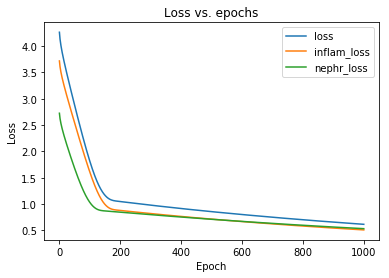

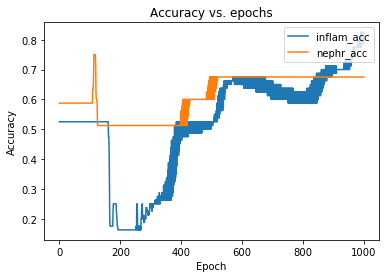

In [18]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [17]:
history.history.keys()

dict_keys(['loss', 'inflam_loss', 'nephr_loss', 'inflam_acc', 'nephr_acc'])

In [19]:
# Evaluate the model
model.evaluate([temp_test,nocc_test,lumbp_test,up_test,mict_test,bis_test],
              [inflam_test,nephr_test],verbose=2)


40/1 - 0s - loss: 0.6232 - inflam_loss: 0.5119 - nephr_loss: 0.5705 - inflam_acc: 0.8500 - nephr_acc: 0.6500


[0.6345000982284545, 0.51193124, 0.57049274, 0.85, 0.65]

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [3]:
import numpy as np

#### Create Variable objects

In [4]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [8]:
tf.Variable(tf.constant(4.2, shape=(3,2)))

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[4.2, 4.2],
       [4.2, 4.2],
       [4.2, 4.2]], dtype=float32)>

#### Use and modify Variable values

In [11]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))
w

<class 'tensorflow.python.framework.ops.EagerTensor'>


<tf.Tensor: id=76, shape=(), dtype=float32, numpy=1.0>

In [13]:
# Increment the value of a Variable

v.assign_add(1)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


In [15]:
# Decrement the value of a Variable

v.assign_sub(1)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [16]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [17]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [19]:
# Create a Tensor of type float32

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=tf.float32)
x

<tf.Tensor: id=87, shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>

In [20]:
# Create coefficients

coeffs = np.arange(16)

In [21]:
# Initialise shapes

shape1=[8,2]
shape2=[4,4]
shape3=[2,2,2,2]
shape4=[4,5]

In [23]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)



 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


#### Useful Tensor operations

In [24]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [25]:
# Get the rank of a Tensor

rank=tf.rank(t)

In [26]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [27]:
# Reshape a Tensor

t2=tf.reshape(t,[8,10])

In [28]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (8, 10)


In [29]:
# Create ones, zeros, identity and constant Tensors

ones=tf.ones(shape=(2,3))
zeros=tf.zeros(shape=(2,4))
eye=tf.eye(3)
tensor7=tf.constant(7.0,shape=(2,2))

In [30]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(2, 4), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7. 7.]
 [7. 7.]], shape=(2, 2), dtype=float32)


In [31]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [32]:
# Concatentate two Tensors

concat0=tf.concat([t1,t2],0)
concat1=tf.concat([t1,t2],1)

In [33]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [34]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [42]:
# Expanding the rank of Tensors

t1=tf.expand_dims(t,0)
t2=tf.expand_dims(t,1)
t3=tf.expand_dims(t,2)

In [36]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 1, 4)


In [43]:
# Squeezing redundant dimensions
t1=tf.squeeze(t1,0)
t2=tf.squeeze(t2,1)
t3=tf.squeeze(t3,2)

In [44]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [45]:
# Slicing a Tensor
x=tf.constant([1,2,3,4,5,6,7])
print(x[1:4])

tf.Tensor([2 3 4], shape=(3,), dtype=int32)


#### Doing maths with Tensors

In [65]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [47]:
# Matrix multiplication

matmul_cd=tf.matmul(c,d)

In [48]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [49]:
# Elementwise operations
c_times_d=c*d
c_plus_d=c+d
c_minus_d=c-d
c_div_d=c/d


In [50]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/d:\n", c_div_d)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/d:
 tf.Tensor(
[[ 1.  2.]
 [inf  4.]], shape=(2, 2), dtype=float32)


In [51]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [52]:
# Absolute value of a Tensor

absx=tf.abs(x)

In [53]:
# Power of a Tensor

powab=tf.pow(a,b)

In [54]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [68]:
# Create a Tensor with samples from a Normal distribution

tn=tf.random.normal(shape=(3,2),mean=0, stddev=1.0)

In [69]:
# Create a Tensor with samples from a Uniform distribution

tu=tf.random.uniform((3,3),minval=0,maxval=10, dtype='int32')

In [62]:
# Create a Tensor with samples from a Poisson distribution

tp=tf.random.poisson((3,3),5)

In [70]:
print(tn)
print(tu)
print(tp)

tf.Tensor(
[[-0.44617265  1.1885387 ]
 [ 0.7727742  -0.30746412]
 [ 0.5547223  -0.61667377]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[7 4 2]
 [9 5 4]
 [5 1 1]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[6. 7. 4.]
 [6. 3. 5.]
 [6. 4. 5.]], shape=(3, 3), dtype=float32)


In [72]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)


***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [4]:
# Load the VGG19 model
#from tensorflow.keras.applications import VGG19
#vgg_model=VGG19()

from tensorflow.keras.models import load_model
vgg_model=load_model('models/Vgg19.h5')

In [5]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
vgg_layers

#### Build a model to access the layer outputs

In [7]:
from tensorflow.keras.models import Model

In [11]:
# Build a model that returns the layer outputs

layer_outputs=[layer.output for layer in vgg_layers]
features=Model(inputs=vgg_input, outputs=layer_outputs)

In [13]:
features

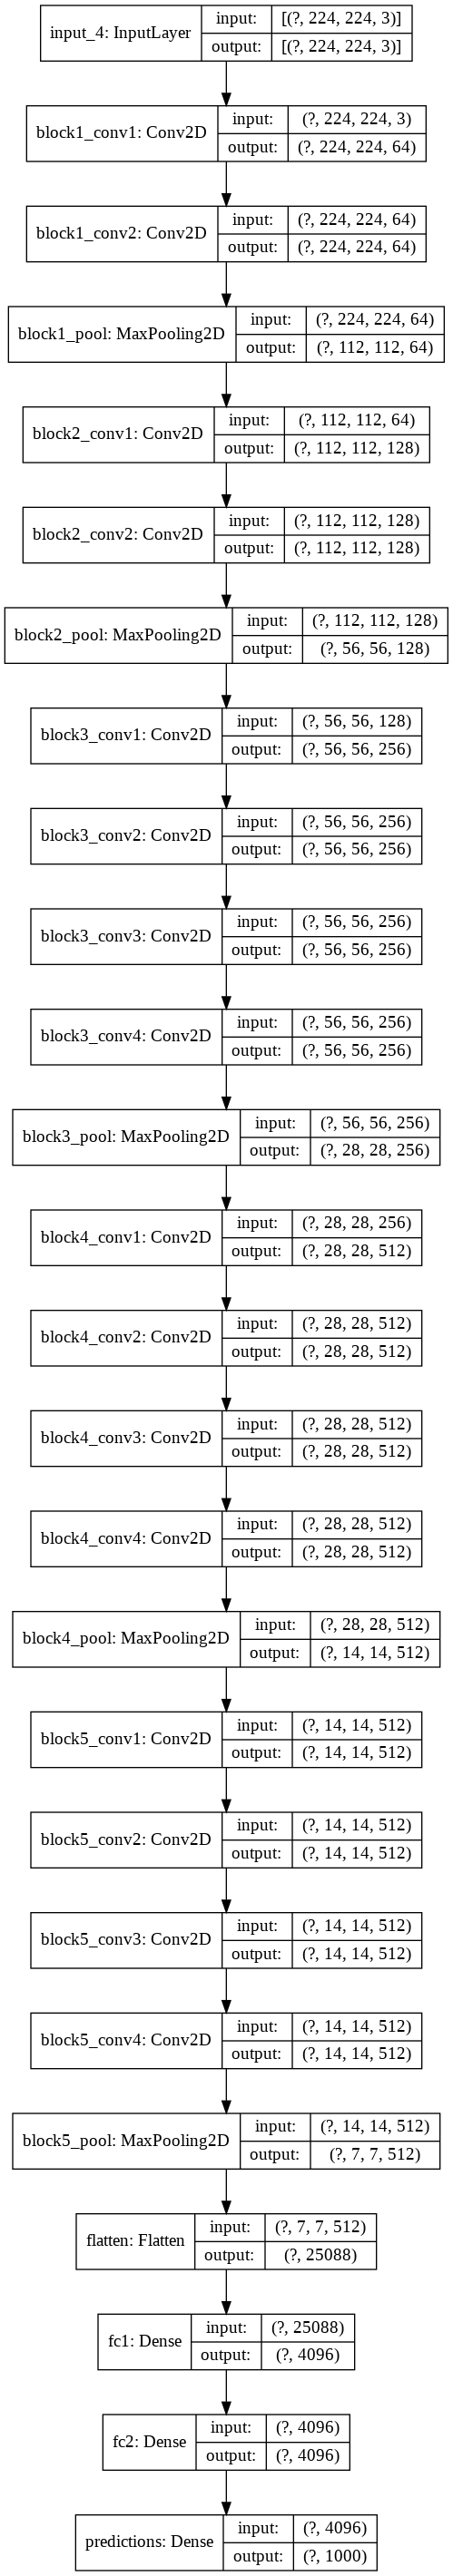

In [14]:
# Plot the model

tf.keras.utils.plot_model(features,'vgg19_model.png',show_shapes=True)

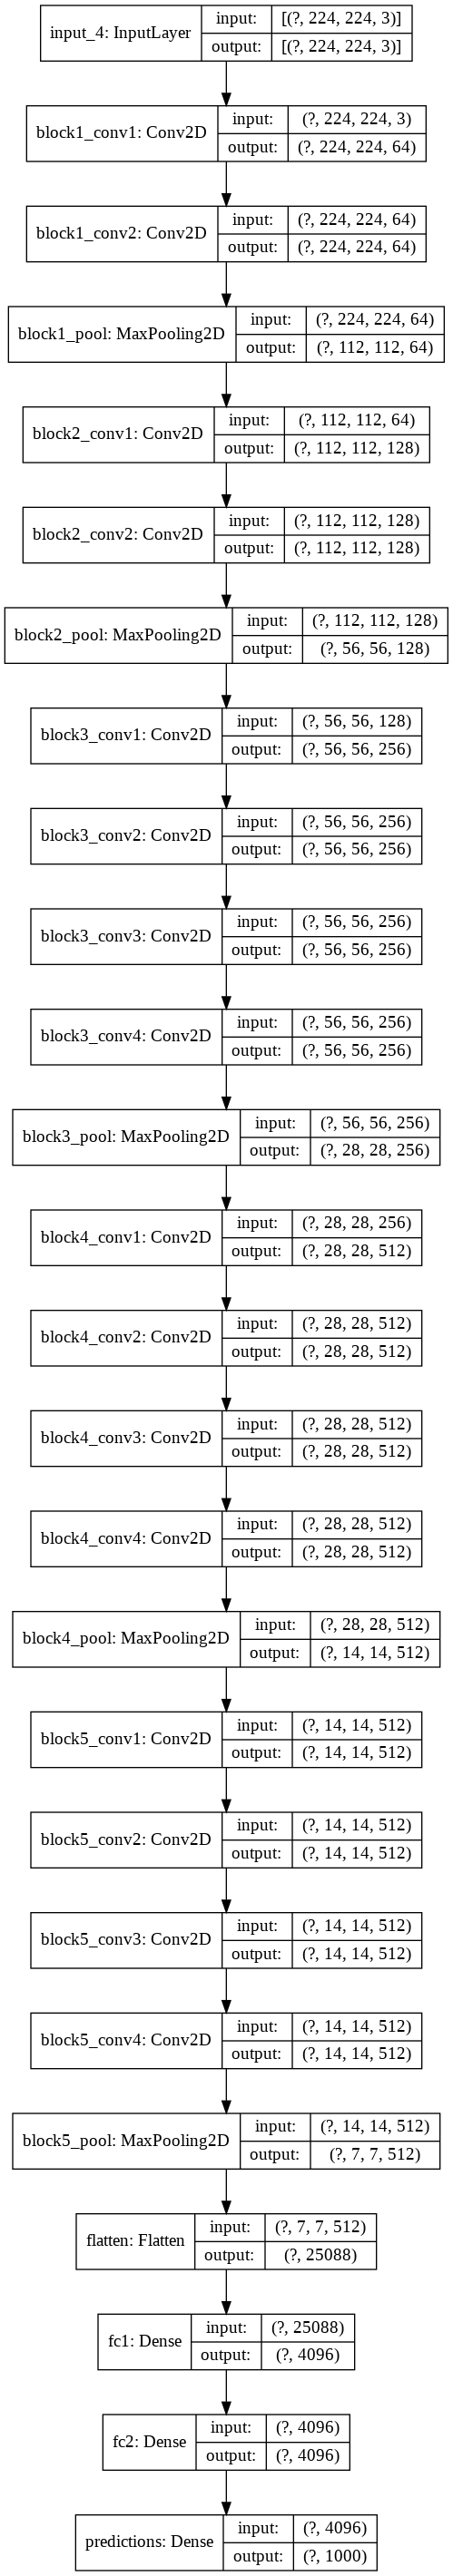

In [15]:
tf.keras.utils.plot_model(vgg_model,'vgg19.png',show_shapes=True)

In [16]:
# Test the model on a random input
img=np.random.random((1,224,224,3)).astype('float32')
extracted_features=features(img)

In [25]:
#look at output tensor on any layer
extracted_features[20]

<tf.Tensor: id=726, shape=(1, 14, 14, 512), dtype=float32, numpy=
array([[[[0.2888263 , 0.        , 0.        , ..., 0.        ,
          0.99524796, 0.        ],
         [0.35699248, 0.        , 0.        , ..., 0.        ,
          0.5807743 , 0.        ],
         [0.31804693, 0.        , 0.        , ..., 0.        ,
          0.69076514, 0.        ],
         ...,
         [0.55581856, 0.        , 0.        , ..., 0.        ,
          0.902801  , 0.        ],
         [0.65735054, 0.        , 0.        , ..., 0.        ,
          0.8082663 , 0.        ],
         [0.47113726, 0.        , 0.        , ..., 0.        ,
          0.8007267 , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.9133843 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.37439626, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.39939517, 0.        ],
         ...,
         [0.        , 

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

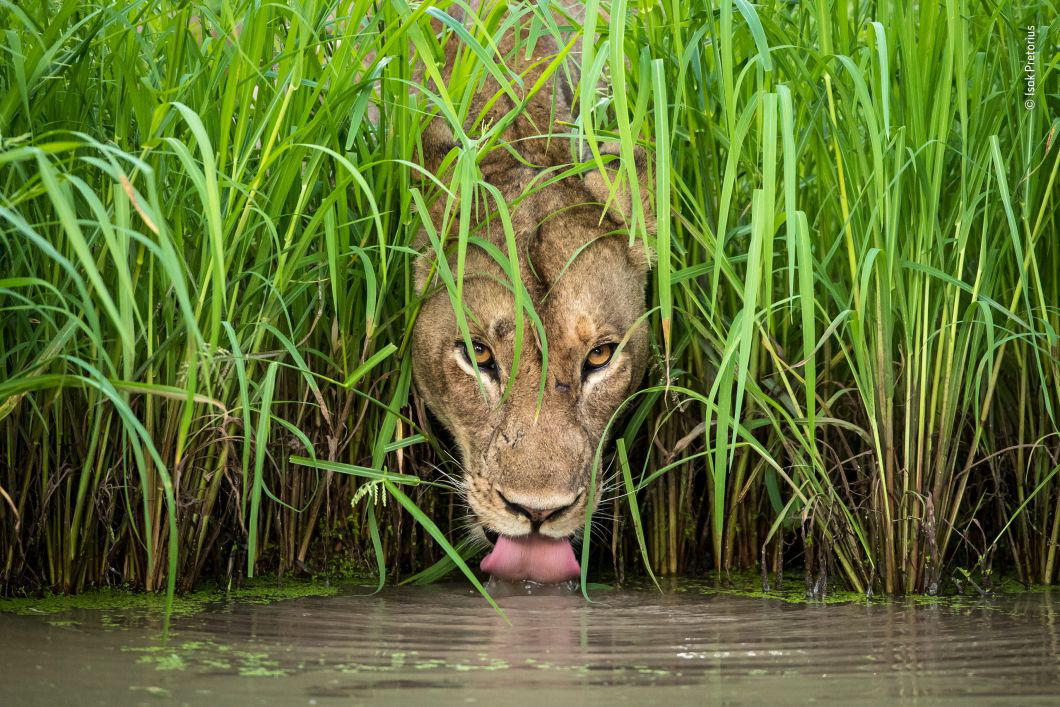

In [26]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('data/cool_cat.jpg'))

#### Visualise network features from the input image

In [35]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = 'data/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [37]:
x.shape

(1, 224, 224, 3)

In [38]:
# Extract the features

extracted_features=features(x)

(1, 224, 224, 3)


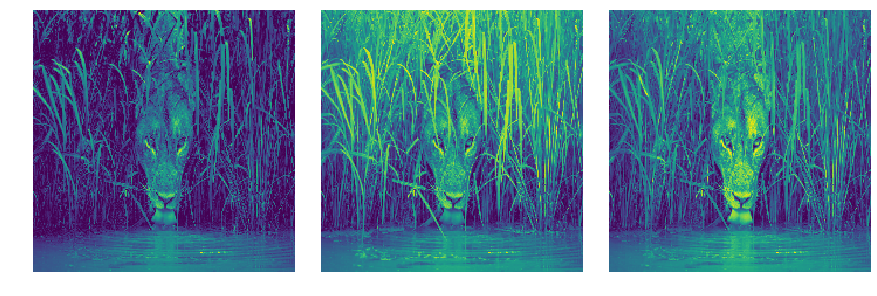

In [54]:
# Visualise the input channels

f1=extracted_features[0]
print(f1.shape)
imgs=f1[0,:,:]
plt.figure(figsize=(15,15))
for n in range(3):
    ax=plt.subplot(1,3,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.1,hspace=0.1)

(1, 224, 224, 64)


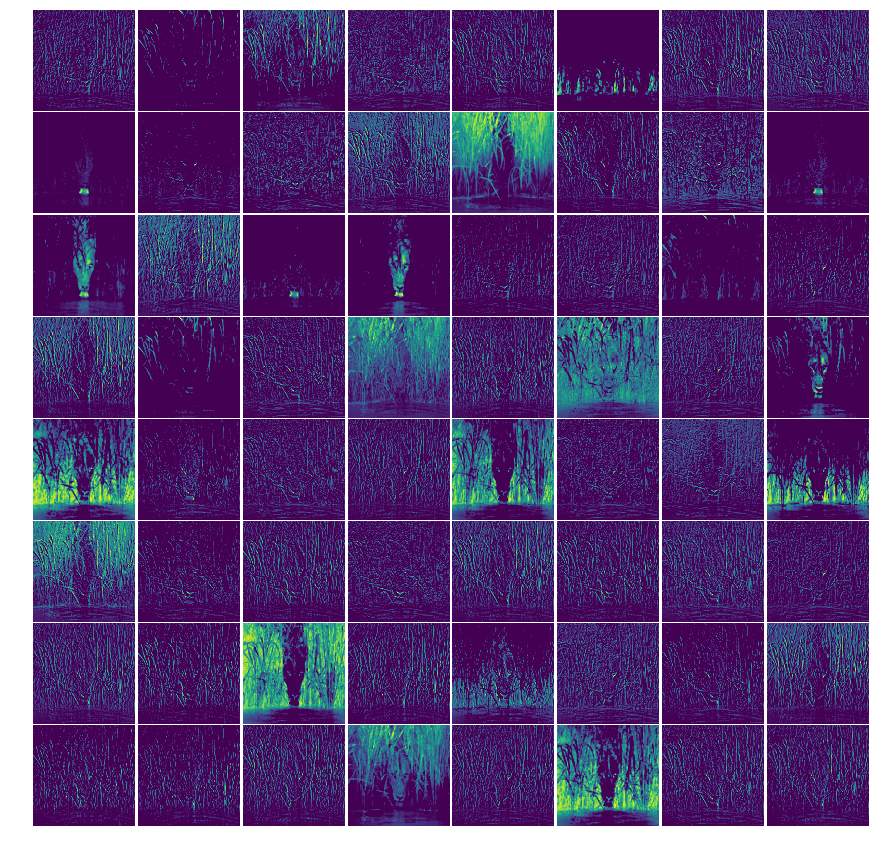

In [56]:
# Visualise some features in the first hidden layer
f2=extracted_features[1]
print(f2.shape)
imgs=f2[0,:,:]
plt.figure(figsize=(15,15))
for n in range(64):
    ax=plt.subplot(8,8,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)


In [57]:
# Build a model to extract features by layer name

extracted_feature_block1_pool=Model(inputs=features.input, outputs=features.get_layer('block1_pool').output)
block1_pool_features=extracted_feature_block1_pool.predict(x)

(1, 112, 112, 64)


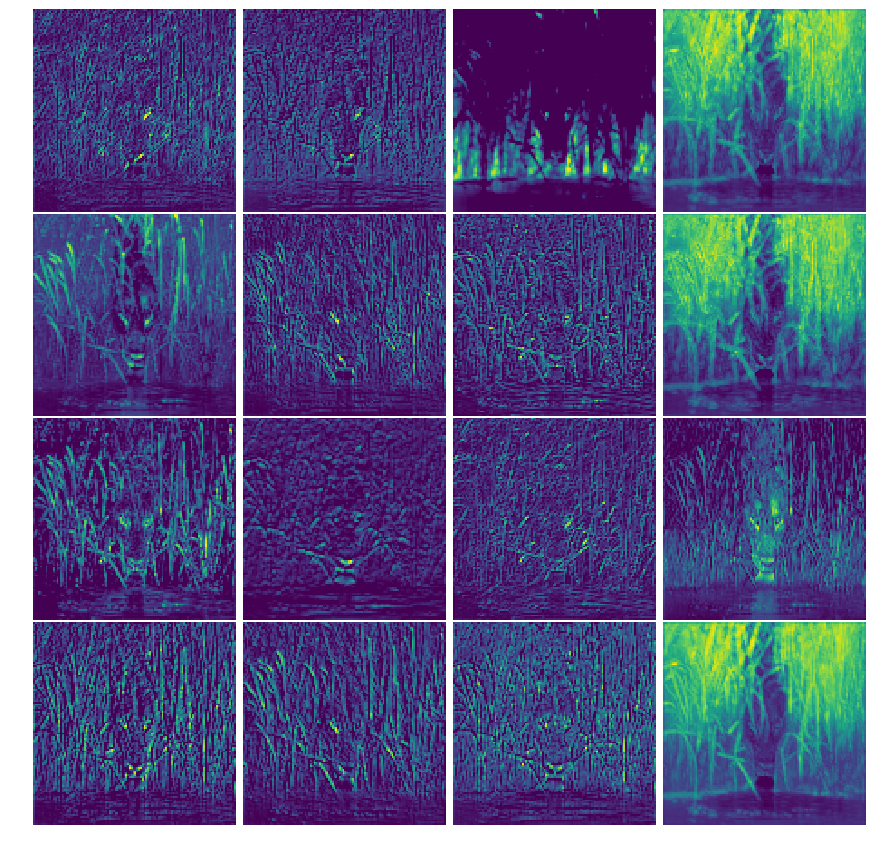

In [58]:
# Visualise some features from the extracted layer output

print(block1_pool_features.shape)
imgs=block1_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax=plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)

(1, 56, 56, 128)


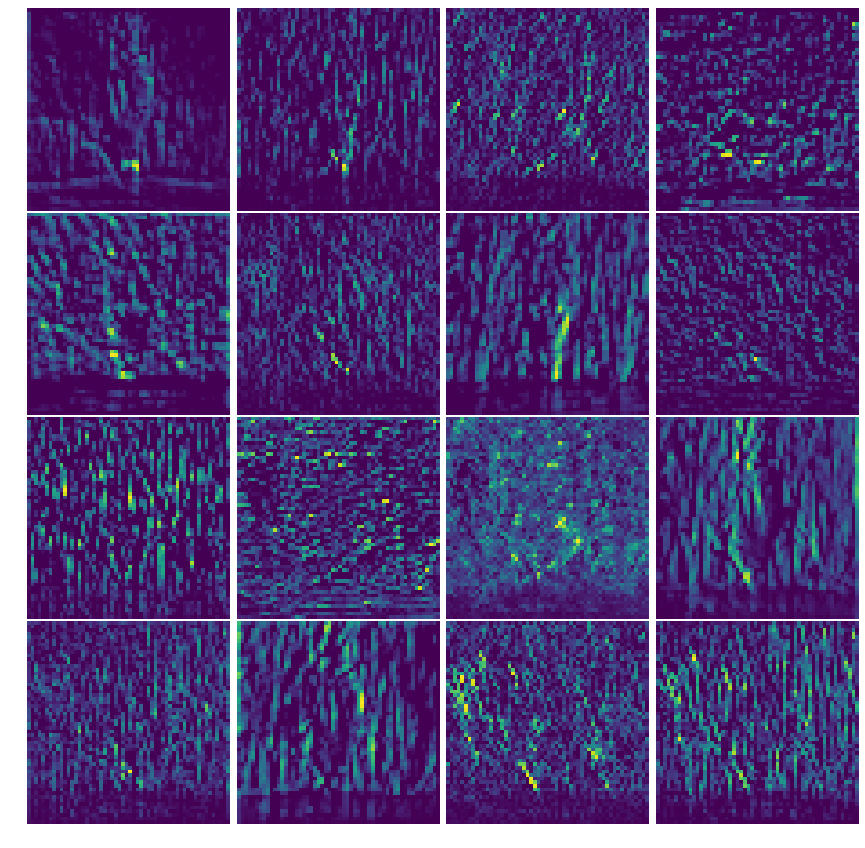

In [59]:
# Extract features from a layer deeper in the network
extracted_feature_block2_pool=Model(inputs=features.input, outputs=features.get_layer('block2_pool').output)
block2_pool_features=extracted_feature_block2_pool.predict(x)

print(block2_pool_features.shape)
imgs=block2_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax=plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)

(1, 28, 28, 256)


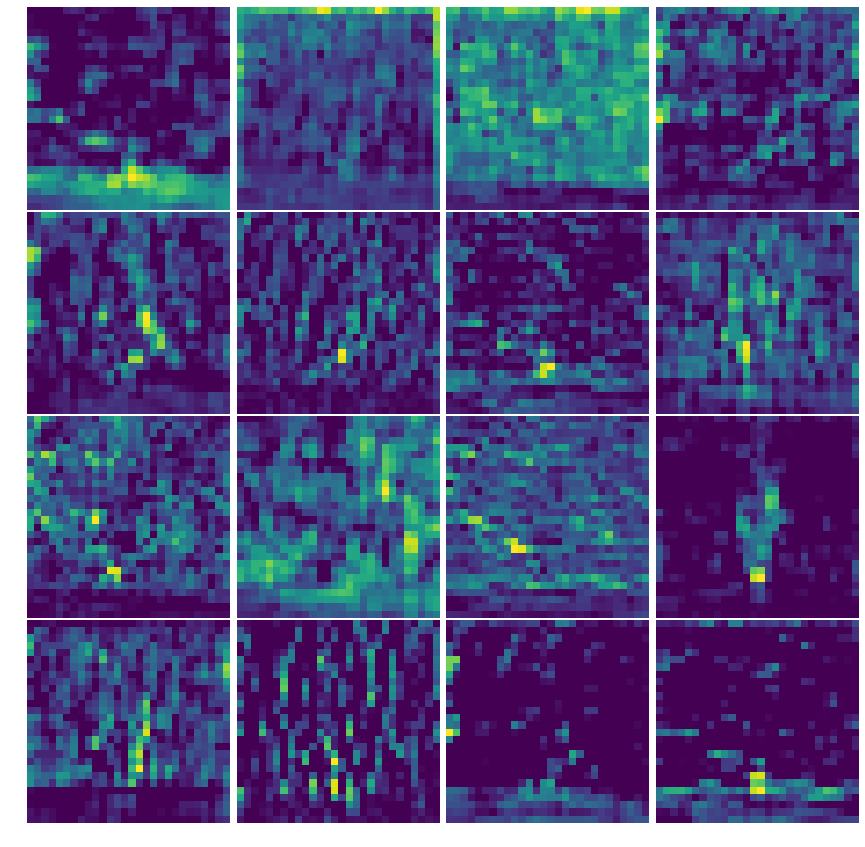

In [60]:
# Extract features from a layer deeper in the network
extracted_feature_block3_pool=Model(inputs=features.input, outputs=features.get_layer('block3_pool').output)
block3_pool_features=extracted_feature_block3_pool.predict(x)

print(block3_pool_features.shape)
imgs=block3_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax=plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)

(1, 14, 14, 512)


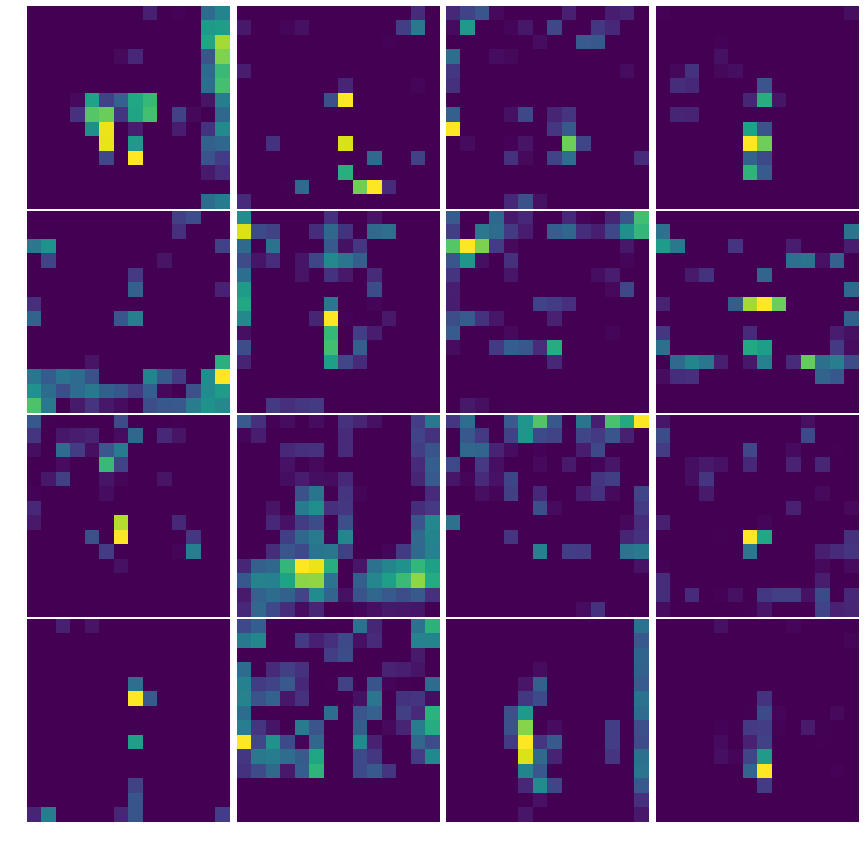

In [61]:
# Extract features from a layer deeper in the network
extracted_feature_block4_pool=Model(inputs=features.input, outputs=features.get_layer('block4_pool').output)
block4_pool_features=extracted_feature_block4_pool.predict(x)

print(block4_pool_features.shape)
imgs=block4_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax=plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)

(1, 7, 7, 512)


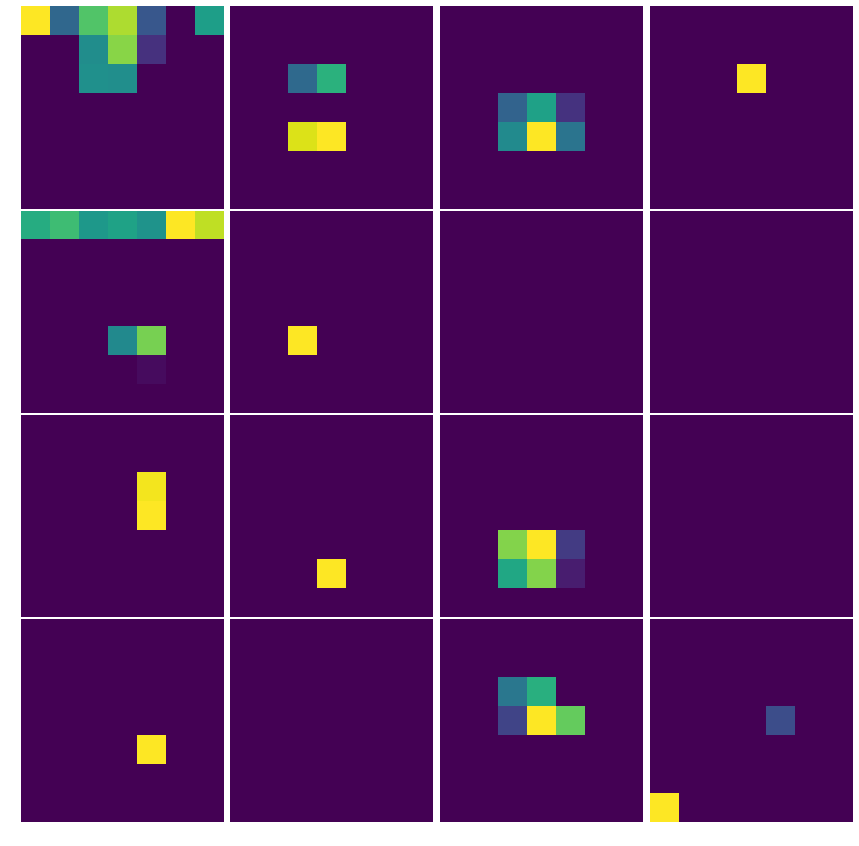

In [62]:
# Extract features from a layer deeper in the network
extracted_feature_block5_pool=Model(inputs=features.input, outputs=features.get_layer('block5_pool').output)
block5_pool_features=extracted_feature_block5_pool.predict(x)

print(block5_pool_features.shape)
imgs=block5_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
    ax=plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [4]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [5]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [6]:
def get_weights(model):
    return [e.weights[0].numpy() for e in model.layers]

def get_bias(model):
    return [e.bias.numpy() for e in model.layers]

def plot_delta_weights(W0_layers,W1_layers,b0_layers,b1_layers):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1,3,n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation');

In [7]:
# Retrieve the weights and biases

W0_layers=get_weights(model)
b0_layers=get_bias(model)

In [8]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [9]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [10]:
# Retrieve weights and biases

W1_layers=get_weights(model)
b1_layers=get_bias(model)

Layer 0: bias variation:  0.318866
Layer 1: bias variation:  0.16418117
Layer 2: bias variation:  0.33432862


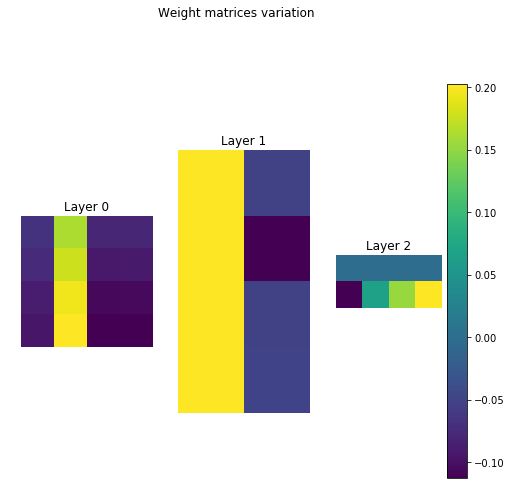

In [11]:
# Plot the variation

plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

#### Freeze layers at build time

In [12]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables=len(model.trainable_variables)
n_non_trainable_variables=len(model.non_trainable_variables)

In [13]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [14]:
# Build the model

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones',trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [15]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables=len(model.trainable_variables)
n_non_trainable_variables=len(model.non_trainable_variables)

In [16]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [17]:
# Retrieve weights and biases

W0_layers=get_weights(model)
b0_layers=get_bias(model)

In [18]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [19]:
# Retrieve weights and biases

W1_layers=get_weights(model)
b1_layers=get_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.1801133
Layer 2: bias variation:  0.27325067


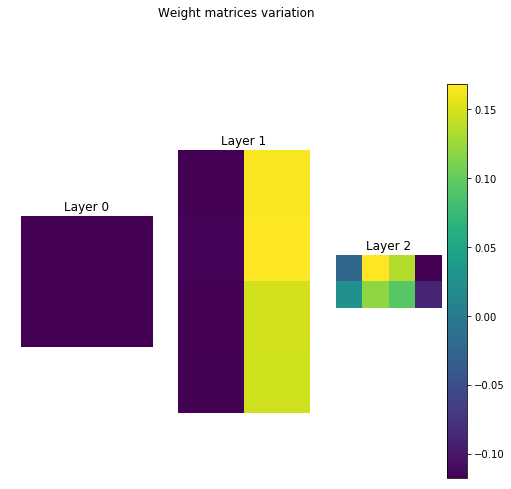

In [20]:
# Plot the variation

plot_delta_weights(W0_layers,W1_layers,b0_layers,b1_layers)

#### Freeze layers of a pre-built model

In [21]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [22]:
# Freeze the second layer

model.layers[1].trainable=False

In [23]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [24]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [26]:
# Retrieve weights and biases

W2_layers=get_weights(model)
b2_layers=get_bias(model)

Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.17442441


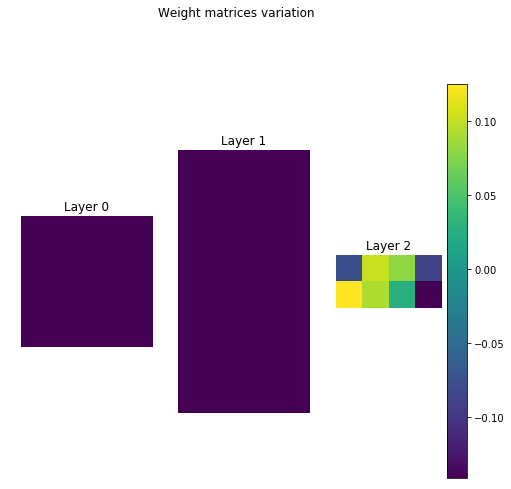

In [27]:
# Plot the variation

plot_delta_weights(W1_layers,W2_layers,b1_layers,b2_layers)